In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [ ]:
### Loading and Prepping the Data ###

In [4]:
gtd = pd.read_excel("gtd.xlsx")
turkey_gtd = gtd[(gtd['country_txt'] == 'Turkey') & (gtd['iyear'].between(2000, 2020))]

# Aggregate by year
terror_data = turkey_gtd.groupby('iyear').size().reset_index(name='attack_count')

In [16]:
# Skip metadata rows and load the actual table
cc = pd.read_csv('API_CC.PER.RNK_DS2_en_csv_v2_21140.csv')
rl = pd.read_csv('API_RL.PER.RNK_DS2_en_csv_v2_27865.csv')

# Strip potential whitespace from column names
cc.columns = cc.columns.str.strip()
rl.columns = rl.columns.str.strip()

# Extract Türkiye's Control of Corruption (CC) and Rule of Law (RL) for 2000–2020
cc_turkey = cc[cc['Country Name'] == 'Turkiye'].loc[:, '2000':'2020'].T
cc_turkey.columns = ['CC']
cc_turkey.index.name = 'year'

rl_turkey = rl[rl['Country Name'] == 'Turkiye'].loc[:, '2000':'2020'].T
rl_turkey.columns = ['RL']
rl_turkey.index.name = 'year'


In [23]:
cc_turkey.index = cc_turkey.index.astype(int)
rl_turkey.index = rl_turkey.index.astype(int)
terror_data['iyear'] = terror_data['iyear'].astype(int)


df = pd.concat([cc_turkey, rl_turkey, terror_data.set_index('iyear')], axis=1).dropna().reset_index()
df.rename(columns={'index': 'year'}, inplace=True)
df['year'] = df['year'].astype(int)

In [ ]:
### Fitting the Model ###

In [25]:
# Define X and y
X = df[['CC', 'RL']]
y = df['attack_count']

# Fit model
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# Evaluation
print("R² Score:", r2_score(y, y_pred))
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


R² Score: 0.2984277717656679
Coefficients: [  8.92040388 -15.59080252]
Intercept: 416.04986866587694


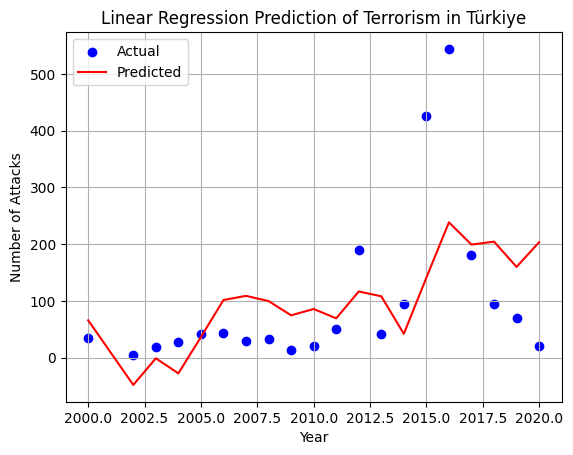

In [26]:
### Visualizing the Result

plt.scatter(df['year'], y, label="Actual", color='blue')
plt.plot(df['year'], y_pred, label="Predicted", color='red')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.title('Linear Regression Prediction of Terrorism in Türkiye')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
### Interpreting the Result

## Data Overview
- **Target variable**: Number of terrorist attacks per year  
  → Sourced from the **Global Terrorism Database (GTD)**
- **Independent variables**:  
  - **Rule of Law (RL)** – percentile rank, from the World Bank  
  - **Control of Corruption (CC)** – percentile rank, from the World Bank  
- **Time period**: 2000–2020  
- **Focus country**: Türkiye

---

## Model Results
- **R² Score**: `0.298`  
  → The model explains roughly **30%** of the variation in yearly terrorist attacks.

- **Coefficients**:
  - `RL`: **−15.59**  
    → A decrease in RL is associated with an increase in terrorist incidents.
  - `CC`: **+8.92**  
    → Shows a weak positive association, possibly due to noise or unaccounted factors.

- **Intercept**: `416.05`

---

## Interpretation
- The **negative RL coefficient** supports the idea that weaker legal systems may be linked to more terrorism.
- The **positive CC coefficient** is less intuitive. It may reflect limitations in the data, the model’s simplicity, or delayed effects not captured by a linear setup.
- While the model identifies general trends, it misses outliers and sudden spikes (e.g., 2016), which is common in simple linear models.

---

## Conclusion
The findings suggest that **governance quality, especially Rule of Law, is related to terrorism levels** in Türkiye. However, the model’s limited explanatory power shows that **other factors or more complex models** (like time-series or multi-level models) might be needed to get a fuller picture.